In [2]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 20 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (8,265 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletyp

# 1. 문자열 처리

In [3]:
text = '챗봇(chatbot) 혹은 채터봇(chatterbot)은 음성이나 문자를 통한 인간과의 대화를 통해서 특정한 작업을 수행하도록 제작된 컴퓨터 프로그램이다. 토크봇(talkbot), 채터박스(chatterbox) 혹은 그냥 봇(bot)라고도 한다.'

In [4]:
text_upper = text.upper()
text_upper

'챗봇(CHATBOT) 혹은 채터봇(CHATTERBOT)은 음성이나 문자를 통한 인간과의 대화를 통해서 특정한 작업을 수행하도록 제작된 컴퓨터 프로그램이다. 토크봇(TALKBOT), 채터박스(CHATTERBOX) 혹은 그냥 봇(BOT)라고도 한다.'

In [5]:
text_lower = text.lower()
text_lower

'챗봇(chatbot) 혹은 채터봇(chatterbot)은 음성이나 문자를 통한 인간과의 대화를 통해서 특정한 작업을 수행하도록 제작된 컴퓨터 프로그램이다. 토크봇(talkbot), 채터박스(chatterbox) 혹은 그냥 봇(bot)라고도 한다.'

In [6]:
text.find('컴퓨터')

75

In [7]:
pos = text.find('컴퓨터')
text[pos : pos+len('컴퓨터 프로그램')]

'컴퓨터 프로그램'

In [8]:
'인공지능' in text

False

In [9]:
len(text)

137

In [10]:
text.count('bot')

4

# 2. WordCloud 생성

In [16]:
from google.colab import files
files.upload()

Saving 챗봇.txt to 챗봇.txt


{'챗봇.txt': b'\xec\xb1\x97\xeb\xb4\x87\r\n\r\n\xeb\xac\xb8\xec\x84\x9c\r\n\xed\x86\xa0\xeb\xa1\xa0\r\n\xec\x9d\xbd\xea\xb8\xb0\r\n\xed\x8e\xb8\xec\xa7\x91\r\n\xec\x97\xad\xec\x82\xac \xeb\xb3\xb4\xea\xb8\xb0\r\n\xec\x9c\x84\xed\x82\xa4\xeb\xb0\xb1\xea\xb3\xbc, \xec\x9a\xb0\xeb\xa6\xac \xeb\xaa\xa8\xeb\x91\x90\xec\x9d\x98 \xeb\xb0\xb1\xea\xb3\xbc\xec\x82\xac\xec\xa0\x84.\r\n\r\n\r\n\xea\xb0\x80\xec\x83\x81 \xeb\xb9\x84\xec\x84\x9c \xec\xb1\x97\xeb\xb4\x87\r\n\xec\xb1\x97\xeb\xb4\x87(chatbot) \xed\x98\xb9\xec\x9d\x80 \xec\xb1\x84\xed\x84\xb0\xeb\xb4\x87(chatterbot)\xec\x9d\x80 \xec\x9d\x8c\xec\x84\xb1\xec\x9d\xb4\xeb\x82\x98 \xeb\xac\xb8\xec\x9e\x90\xeb\xa5\xbc \xed\x86\xb5\xed\x95\x9c \xec\x9d\xb8\xea\xb0\x84\xea\xb3\xbc\xec\x9d\x98 \xeb\x8c\x80\xed\x99\x94\xeb\xa5\xbc \xed\x86\xb5\xed\x95\xb4\xec\x84\x9c \xed\x8a\xb9\xec\xa0\x95\xed\x95\x9c \xec\x9e\x91\xec\x97\x85\xec\x9d\x84 \xec\x88\x98\xed\x96\x89\xed\x95\x98\xeb\x8f\x84\xeb\xa1\x9d \xec\xa0\x9c\xec\x9e\x91\xeb\x90\x9c \xec\xbb\xb4\

In [19]:
!pip install koNLpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 19.4 MB 1.4 MB/s 
     |████████████████████████████████| 453 kB 56.9 MB/s 


In [12]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS
import matplotlib.pyplot as plt

from PIL import Image
import numpy as np

In [17]:
f = open('./챗봇.txt', 'r', encoding='UTF8')
text = f.read()
text

'챗봇\n\n문서\n토론\n읽기\n편집\n역사 보기\n위키백과, 우리 모두의 백과사전.\n\n\n가상 비서 챗봇\n챗봇(chatbot) 혹은 채터봇(chatterbot)은 음성이나 문자를 통한 인간과의 대화를 통해서 특정한 작업을 수행하도록 제작된 컴퓨터 프로그램이다. 토크봇(talkbot), 채터박스(chatterbox) 혹은 그냥 봇(bot)라고도 한다.\n\n인간이 사용하는 언어를 이해해서 대화를 진행하는 자연언어처리 기술을 심각하게 적용하는 언어이해 방식, 입력받은 말에서 특정 단어나 어구를 검출하여 그에 맞는 미리 준비된 응답을 출력하는 검색 방식,\n\n그리고 각본을 미리 만들고 각본에 따라서 사용자의 입력에 대한 동작과 각본에 있는 응답을 출력하는 각본 방식이 있다.\n\n네이버클라우드플랫폼, 카카오톡, LINE, 슬랙, 페이스북 메신저, 스냇치봇 등에서 챗봇을 구동할 수 있는 API를 제공한다.\n\n개발\n전통적인 역사 초기의 채터봇은 ELIZA(1966년)와 PARRY(1972년)이다.[1][2][3][4] 더 최근의 저명한 프로그램들에는 A.L.I.C.E., Jabberwacky, D.U.D.E가 있다. 2017년, 이스라엘 회사 SnatchBot은 감정을 분석하는 봇을 구축하는 역량을 가진 챗봇 생성 웹사이트를 런칭했다.[5]\n\n부작용\n악성 챗봇은 주로 채팅방에서 익명성을 내세워 스팸 및 광고로 도배하는데 쓰이거나, 다른 사람의 은행 계좌와 같은 개인정보를 캐내기 위해 쓰인다. 주로 야후 메신저, 윈도우 라이브 메신저, AOL 메신저 등 익명의 인스턴트 메신저 프로토콜에서 주로 보인다.[6]\n\n상호 작용을 통해 학습하는 AI 챗봇인 테이는 트위터에서 인터넷 트롤의 표적이되어 큰 논란을 일으켰다. 봇이 악용되었고 16 시간 동안 다른 사용자들에게 공격적인 트윗을 보냈다. 이는 봇이 경험을 통해 효과적으로 학습했지만 오용을 방지하기위한 적절한 보호 수단이 마련되지 않았음을 의미한다.[7]\n\n텍스트 전송 알고리즘이 챗봇이 아닌 사람

In [18]:
mask = np.array(Image.open('./cloudMask.png'))
mask

array([[[255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        ...,
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0]],

       [[255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        ...,
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0]],

       [[255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        ...,
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0]],

       ...,

       [[255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        ...,
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0]],

       [[255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        ...,
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0]],

       [[255

In [23]:
from konlpy.tag import Okt
tagger = Okt()
nouns = tagger.nouns(text)
nounToStr = ' '.join(nouns)

In [26]:
from matplotlib.cm import ma
path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
s_words = STOPWORDS.union({
    '이', '등', '의', '를', '것', '그', '이후', '도', '후', '모두', '또한', '따라서', '통한'
})
wordcloud = WordCloud(
    font_path=path, 
    stopwords=s_words, 
    mask=mask,
    background_color='white'
  ).generate(nounToStr)

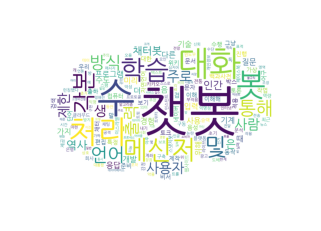

In [27]:
plt.imshow(wordcloud)
plt.axis('off')
plt.show()